In [ ]:
!pip install torch-lr-finder
!pip install torchsummary

# Load libraries

In [59]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import train_test_loader
import show_images
from new_model import Net
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [71]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Augmentation

In [61]:
means = [0.4914, 0.4822, 0.4465]
stds = [0.2470, 0.2435, 0.2616]

train_transforms = A.Compose(
    [

        A.Normalize(mean=means, std=stds, always_apply=True),
        A.PadIfNeeded(min_height=40, min_width=40, always_apply=True),
        A.RandomCrop(height=32, width=32, always_apply=True),
        A.HorizontalFlip(),
        A.CoarseDropout(max_holes=1, max_height=8, max_width=8, min_holes=1, min_height=8, min_width=8, fill_value=means),
        ToTensorV2(),
    ]
)

test_transforms = A.Compose(
    [
        A.Normalize(mean=means, std=stds, always_apply=True),
        ToTensorV2(),
    ]
)

# Load train test data

In [3]:
classes, trainloader, testloader = train_test_loader.load(train_transforms,test_transforms,batch_size=512)

# Visualize Training Data

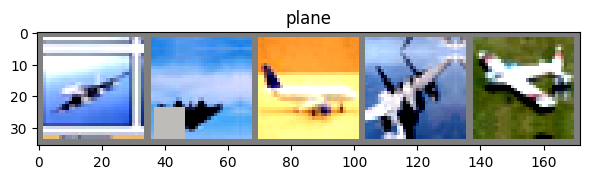

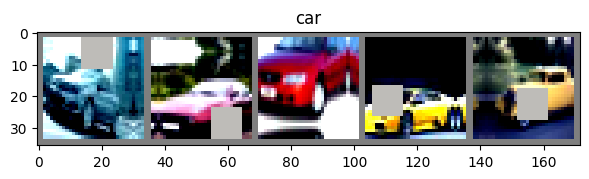

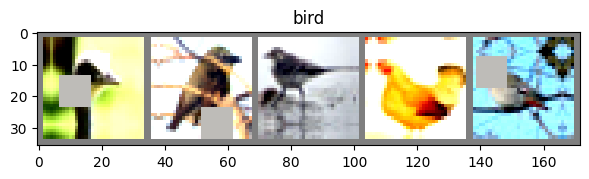

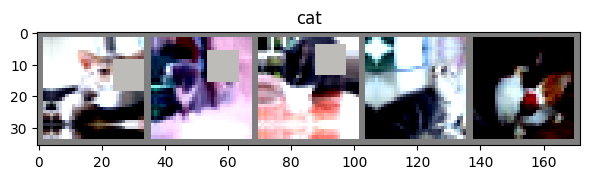

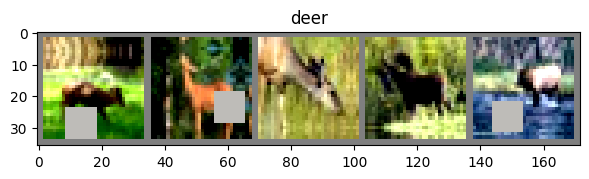

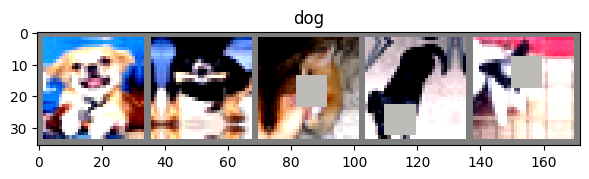

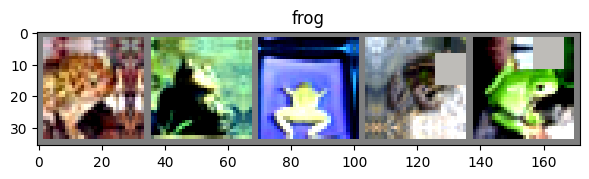

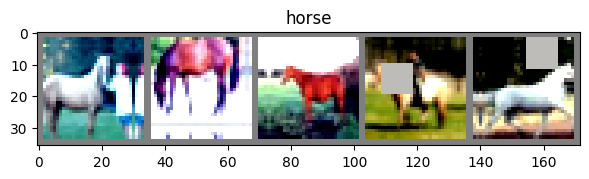

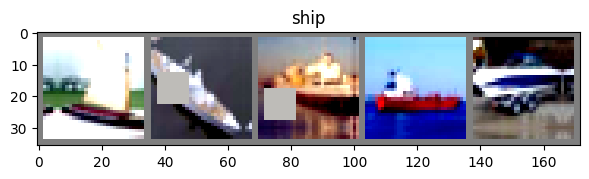

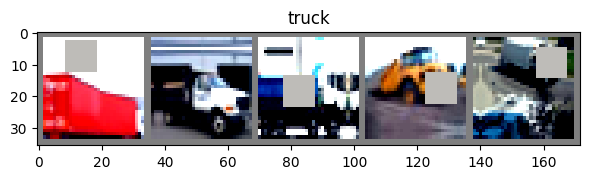

In [66]:
show_images.show_train_data(trainloader, classes)

# Model Summary

In [68]:

from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

## Find Max Learning Rate using LRFinder

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.51E-02


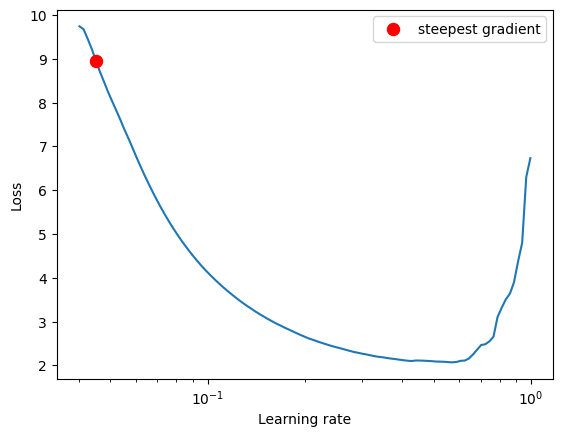

In [73]:
from torch_lr_finder import LRFinder

model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.03, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

# Model Training

In [75]:
EPOCHS = 24
scheduler = OneCycleLR(
        optimizer,
        max_lr=4.51E-02,
        steps_per_epoch=len(trainloader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=100,
        three_phase=False,
        final_div_factor=100,
        anneal_strategy='linear'
    )
train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,24,scheduler,batch_scheduler=True,best_acc = 0,path = "/content/drive/MyDrive/EVA/bestmodel.pt")

EPOCH: 1 LR: 0.000451


Loss=1.0551509857177734 Batch_id=97 Accuracy=50.79: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]



Test set: Average loss: 0.0031, Accuracy: 5170/10000 (51.70%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.009399061349693252


Loss=0.9450666308403015 Batch_id=97 Accuracy=64.69: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 0.0026, Accuracy: 6039/10000 (60.39%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.018347122699386504


Loss=0.9398801922798157 Batch_id=97 Accuracy=71.48: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]



Test set: Average loss: 0.0022, Accuracy: 6678/10000 (66.78%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.027295184049079754


Loss=0.7636798024177551 Batch_id=97 Accuracy=73.90: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]



Test set: Average loss: 0.0022, Accuracy: 6529/10000 (65.29%)

EPOCH: 5 LR: 0.03624324539877301


Loss=0.6837905049324036 Batch_id=97 Accuracy=74.76: 100%|██████████| 98/98 [00:19<00:00,  4.90it/s]



Test set: Average loss: 0.0018, Accuracy: 6896/10000 (68.96%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.045075781154672395


Loss=0.6199973225593567 Batch_id=97 Accuracy=75.85: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]



Test set: Average loss: 0.0019, Accuracy: 6759/10000 (67.59%)

EPOCH: 7 LR: 0.04270233431256713


Loss=0.699190616607666 Batch_id=97 Accuracy=76.58: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]



Test set: Average loss: 0.0020, Accuracy: 6521/10000 (65.21%)

EPOCH: 8 LR: 0.04032888747046187


Loss=0.6420596241950989 Batch_id=97 Accuracy=76.76: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]



Test set: Average loss: 0.0016, Accuracy: 7264/10000 (72.64%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.03795544062835661


Loss=0.5895332098007202 Batch_id=97 Accuracy=77.47: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]



Test set: Average loss: 0.0023, Accuracy: 6358/10000 (63.58%)

EPOCH: 10 LR: 0.03558199378625134


Loss=0.5943489074707031 Batch_id=97 Accuracy=78.17: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 0.0017, Accuracy: 7169/10000 (71.69%)

EPOCH: 11 LR: 0.03320854694414608


Loss=0.6503227949142456 Batch_id=97 Accuracy=78.38: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]



Test set: Average loss: 0.0012, Accuracy: 7967/10000 (79.67%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.030835100102040817


Loss=0.6336188912391663 Batch_id=97 Accuracy=79.18: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]



Test set: Average loss: 0.0015, Accuracy: 7302/10000 (73.02%)

EPOCH: 13 LR: 0.028461653259935552


Loss=0.6672274470329285 Batch_id=97 Accuracy=79.17: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 0.0012, Accuracy: 7981/10000 (79.81%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.02608820641783029


Loss=0.6419022679328918 Batch_id=97 Accuracy=79.92: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]



Test set: Average loss: 0.0015, Accuracy: 7547/10000 (75.47%)

EPOCH: 15 LR: 0.023714759575725025


Loss=0.5485968589782715 Batch_id=97 Accuracy=80.69: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]



Test set: Average loss: 0.0011, Accuracy: 8124/10000 (81.24%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.021341312733619763


Loss=0.5744737982749939 Batch_id=97 Accuracy=81.42: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]



Test set: Average loss: 0.0013, Accuracy: 7696/10000 (76.96%)

EPOCH: 17 LR: 0.0189678658915145


Loss=0.5631722211837769 Batch_id=97 Accuracy=81.91: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]



Test set: Average loss: 0.0012, Accuracy: 7960/10000 (79.60%)

EPOCH: 18 LR: 0.016594419049409236


Loss=0.5220341086387634 Batch_id=97 Accuracy=82.95: 100%|██████████| 98/98 [00:20<00:00,  4.83it/s]



Test set: Average loss: 0.0010, Accuracy: 8223/10000 (82.23%)

accuracy increased, Saving model....
EPOCH: 19 LR: 0.014220972207303971


Loss=0.5537781715393066 Batch_id=97 Accuracy=84.15: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]



Test set: Average loss: 0.0012, Accuracy: 8121/10000 (81.21%)

EPOCH: 20 LR: 0.01184752536519871


Loss=0.44356200098991394 Batch_id=97 Accuracy=85.09: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]



Test set: Average loss: 0.0010, Accuracy: 8367/10000 (83.67%)

accuracy increased, Saving model....
EPOCH: 21 LR: 0.009474078523093447


Loss=0.3882337212562561 Batch_id=97 Accuracy=86.33: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]



Test set: Average loss: 0.0008, Accuracy: 8648/10000 (86.48%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.007100631680988186


Loss=0.3453579545021057 Batch_id=97 Accuracy=87.97: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]



Test set: Average loss: 0.0009, Accuracy: 8599/10000 (85.99%)

EPOCH: 23 LR: 0.004727184838882917


Loss=0.22991470992565155 Batch_id=97 Accuracy=89.82: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]



Test set: Average loss: 0.0006, Accuracy: 8970/10000 (89.70%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.002353737996777662


Loss=0.224569633603096 Batch_id=97 Accuracy=91.82: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]



Test set: Average loss: 0.0005, Accuracy: 9114/10000 (91.14%)

accuracy increased, Saving model....
